### SVM是支持向量机的简称，全称为Supported Vector Machine

<font size = 4><font face = '华文宋体'>我们用感知机解决的是线性可分的问题，在线性回归中我们解决的是线性相关问题。这里我认为线性可分和线性相关是有区别的。

我们可以用多项式回归解决线性不相关的问题。

当使用线性模型逼近非线性模型时，增加特征空间的维度是一种比较可行的方法，但是他会带来两个问题。

1、电脑算力的问题。计算映射特征和计算更大的向量会需要更多的算力 $$\$$ 2、模型的泛化能力，增加特征表示的维度会加剧维度诅咒的程度，为了避免这一问题，从高维度特征表示中学习需要的训练数据将成指数增长。</font>

## SVM(支持向量机)的思想

<font size = 4>支持向量机，仍然使用的思想是将特征映射到更高的维度空间中。同时SVM既可以解决分类问题又可以解决回归问题。该方法通过一些技巧将有效地解决模型遇到的计算问题和泛化问题。</font>

<font size = 4>支持向量机是一种二分类模型，它的基本模型是定义在特征空间上的间隔最大的线性分类器，间隔最大在这里是关键。接下来我会解释什么叫间隔最大。同时SVM还使用了**核技巧**，这使得SVM实际上成为了一个非线性的分类器。SVM的学习策略就是间隔最大化，可形式化表示为一个求解凸二次规划的问题，也等价于正则化的合页损失函数的最小化问题。SVM的学习算法就是求解凸二次规划的最优化算法。$$\$$SVM学习的基本想法是求解能够正确划分训练数据集并且几何间隔最大的分离超平面。</font>

<font size = 4>举例说明，如下图所示$w \cdot x + b = 2$ 即为分类超平面，对于线性可分的数据集来说，这样的超平面有无穷多个（感知机），但是几何间隔最大的分离超平面却是唯一的。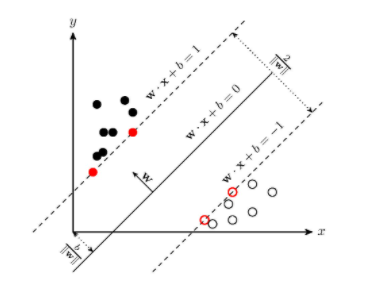 </font>

<font size = 4>什么是**几何间隔**：对于给定的数据集_T_和超平面$ w \cdot x + b = 0 $，定义超平面关于样本点$(x_i, y_i)$的几何间隔为$ \gamma_i = y_i(\frac w {\mid\mid w \mid\mid} \cdot x_i + \frac b {\mid\mid w \mid\mid})$。超平面关于所有样本点的几何间隔的最小值为：$\gamma = \underset{i = 1,2,...,N}{min} \gamma_i$。实际上这个距离就是我们所谓的支持向量到超平面的距离</font>

## 核函数

<font size = 3>_Kernel methods owe their name to the use of kernel functions, which enable them to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. This operation is often computationally cheaper than the explicit comutation of the coordinates. The approach is called the 'kernel trick'. Kernel functions have been introduced for sequence data, graphs, text, images, as well as vectors_.</font>

<font size = 4>支持向量机通过某非线性变换$\phi(X)$，将输入空间映射到高维特征空间中。特征空间的维数可能非常高。如果支持向量机的求解只用到内积运算，而在低维输入空间又存在某个函数$K（x, x')$，它恰好等于在高维空间中的这个内积，即$K(x, x') = <\varphi(x)\cdot \varphi(x')>$。那么支持向量机就不用计算复杂的非线性变换，而是通过核函数直接得到非线性变换后高维向量的内积，便大大简化了计算。</font>

<font size = 4>核函数就是一个函数，这个函数能将将向量映射到高维空间中后向量的内积通过一种较为简单的方式计算出来。我们的目标是计算向量在高维空间中的内积，那么无论通过什么方法我们达到我们的目的就可以。传统方法一定是我们将向量映射到高维空间中，然后直接计算它的内积，但是这种方法对于算力的要求会比较高，因此如果能够有一种可以替代它的方法那就非常好了。这里我们就可以使用**核方法**，核函数是一个可以不用把向量映射到高维空间中就可以得到向量在高维空间中内积的方法，直接通过核函数计算内积，可以大大提高模型的性能。$$\$$ **因为要将向量映射到高维空间中我们需要消耗电脑大量的算力**</font>

### 核函数的分类
<font size = 4> **核函数包括线性核函数，多项式核函数，高斯核函数**。
    
其中使用最为广泛的高斯核函数。对于处理非线性模型来所高斯核是第一选择。高斯核函数也叫做径向基函数。之所以最常使用它，是因为高斯核可以将数据映射到无穷维，其产出的特征空间可以拥有无限维度，这是其他特征空间不可能具有的特性。
    
高斯核定义如下：
$$ K(x, x') = exp(-\gamma|x - x'|^2) $$

多项式核公式如下：
$$ K(x, x') = (\gamma<x-x'> + r)^k$$
    

</font> 

<font size = 4>核函数在SVM中的使用是用于在将特征映射到高维空间中，为方便计算而设计的。支持向量机的基本思想我认为有两个：第一个就是将在低维度空间无法进行分类的数据映射到高维空间中来进行分类。同时引入核函数，从而使得这一问题得到简化，第二个技巧应该它会找到那一条几何间隔最大的分离超平面。 $$\$$ 分离超平面的求法并不简单，需要用到复杂的数学公式</font>

<font size = 4>什么是**几何间隔**：对于给定的数据集_T_和超平面$ w \cdot x + b = 0 $，定义超平面关于样本点$(x_i, y_i)$的几何间隔为$ \gamma_i = y_i(\frac w {\mid\mid w \mid\mid} \cdot x_i + \frac b {\mid\mid w \mid\mid})$。超平面关于所有样本点的几何间隔的最小值为：
    $\gamma = \underset{i = 1,2,...,N}{min} \gamma_i$。实际上这个距离就是我们所谓的支持向量到超平面的距离</font>

<font size = 4>这里给出书上的解释：首先给出什么是函数间隔：$$ funct = miny_if(x_i)$$  $$f(x) = <w, x> + b$$对于上面的式子：我们称函数间隔等于1的实例为支持向量。和函数间隔相关联的有几何间隔，或者支持向量的最大宽度。几何间隔等于标准化函数间隔，由于函数间隔能通过w进行放缩，因此对函数间隔进行标准化非常有必要。当w是一个单位向量时，几何间隔等于函数间隔。我们可以将最佳决策边界正式定义为具有最大几何间隔的决策边界。最大化几何间隔的模型参数可以通过对约束优化问题求解得出：$$min \frac 1 2<w,w>$$ 满足：$$y_i \cdot(<w_ix_i> + b) \ge 1 (公式1)$$SVM的一个有用的特性是公式1的优化问题是一个凸优化问题，它的局部最小值也是全局最小值。</font>

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import matplotlib.cm as cm

In [6]:
mnist = fetch_openml('mnist_784')

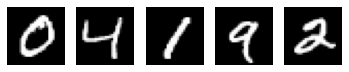

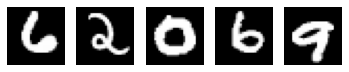

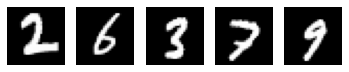

In [10]:
counter = 1
for i in range(1, 4):
    for j in range(1, 6):
        plt.subplot(3,5,counter)
        plt.imshow(mnist.data[(i - 1) * 8000 + j].reshape(28, 28), cmap = cm.Greys_r)
        plt.axis('off')
        counter += 1
    plt.show()

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [17]:
if __name__ == '__main__':
    X,y = mnist.data, mnist.target
    X = X/255 * 2 - 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11)
    
    pipeline = Pipeline([
        ('clf', SVC(kernel = 'rbf', gamma = 0.01, C = 100))
    ])
    
    parameters = {
        'clf__gamma' : (0.01, 0.03, 0.1, 0.3, 1),
        "clf__C":(0.1, 0.3, 1, 3, 10, 30),
    }
    
    grid_search = GridSearchCV(pipeline, parameters, n_jobs = 2, verbose = 1, scoring = 'accuracy')
    grid_search.fit(X_train[:10000], y_train[:10000])
    print('Best score: %0.3f' % grid_search.best_score_)
    print('Best parameters set:')
    best_parameters = grid_search.best_estimator_.get_params()
    for para_name in sorted(parameters,keys()):
        print('\t%s: %r' % (para_name, best_parameters[param_name]))
    predications = grid_search.predict(X_test)
    print(classification_report(y_test, predictions))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 589.1min
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed: 742.9min finished


KeyboardInterrupt: 

<font size = 4>支持向量机，即可用于回归任务也可用于分类任务。其中其强大之处在于可以将再低维度空间中线性不可分的数据集映射到高维空间中</font>